In [2]:
#%matplot qt   # to be uncommented when the mathplot.animation is used or to have all figures in separate windows
import numpy as np
import primaldual as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from IPython.display import clear_output
from time import sleep

#### Load image and create an image of noise

In [3]:
f = mpimg.imread('barb.png') #load image
noise = np.random.normal(0, .1, f.shape) #generate some noise


# Rudin-Osher-Fatemi $TV-L^2$ Model

We denote the input and output image $f$, $u$, respectively. The algorithm solves

$$u=\arg\min_u \|\nabla u\|_1+\frac{\lambda}{2}\|f-u\|_2^2$$

#### Set parameters

In [4]:
lambd = 10.0 #regularization
tau = 0.01 #dual fidelity
theta = 1.0 #primal-dual selection method (1 <=> guaranteed convergence
N = 100 #number of iteration

#### Display the noisy image

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

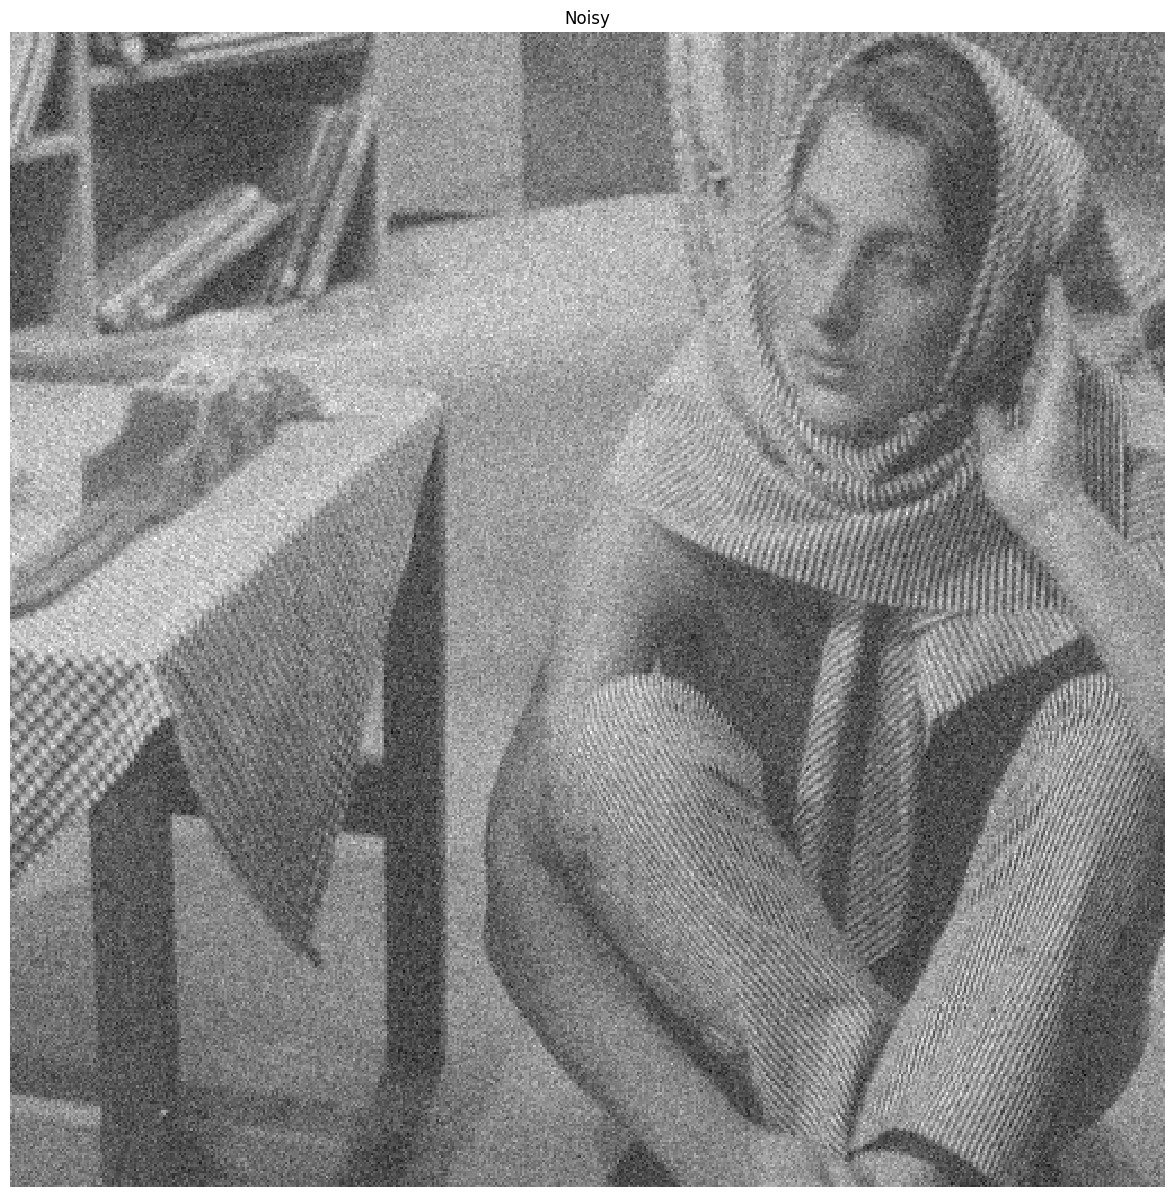

In [5]:
fig1 = plt.figure(figsize=(15,15))
plt.imshow(f+noise, cmap="gray", interpolation='none')
#plt.rcParams['figure.figsize'] = [1024, 1024]
plt.title('Noisy')
plt.axis('off')

#### Apply the Rudin-Osher-Fatemi algorithm

In [6]:
u = pd.PD_ROF(f+noise, lambd, tau, theta, N)

#### Display the result

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

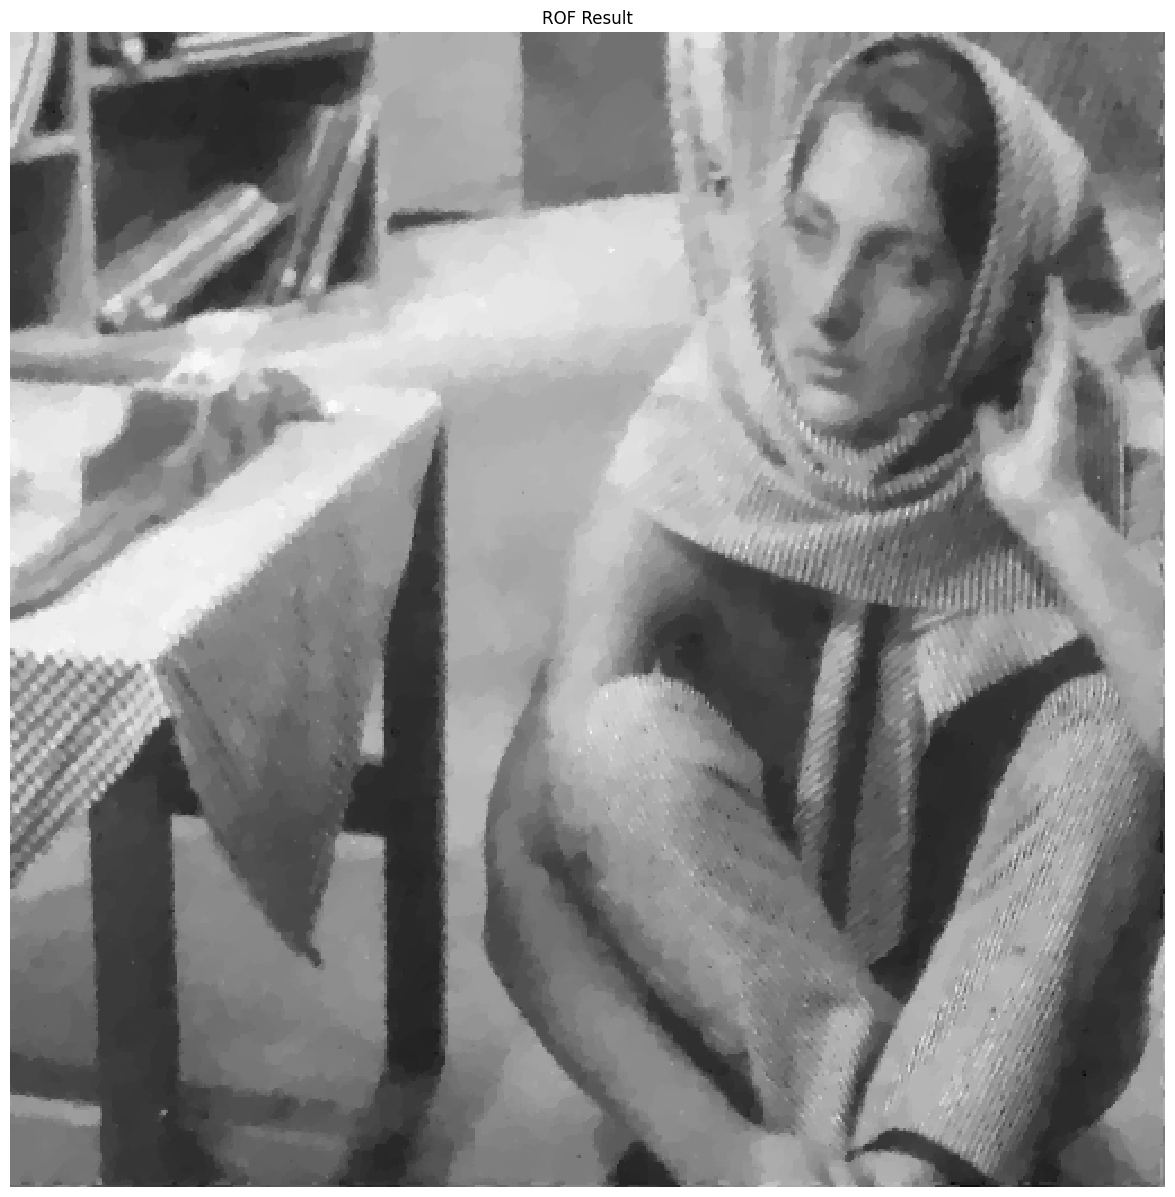

In [7]:
fig2 = plt.figure(figsize=(15,15))
plt.imshow(u, cmap="gray", interpolation='none')
plt.title('ROF Result')
plt.axis('off')

# $TV-L^1$ Model
The algorithm solves

$$u=\arg\min_u \|\nabla u\|_1+\frac{\lambda}{2}\|f-u\|_1$$

#### Set parameters

In [8]:
lambd = 1.2 #regularization
tau = 0.01 #dual fidelity
theta = 1.0 #primal-dual selection method (1 <=> guaranteed convergence
N = 100 #number of iteration

#### Apply the $TV-L^1$ algorithm

In [9]:
u = pd.PD_TVL1(f+noise, lambd, tau, theta, N)

#### Display the result

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

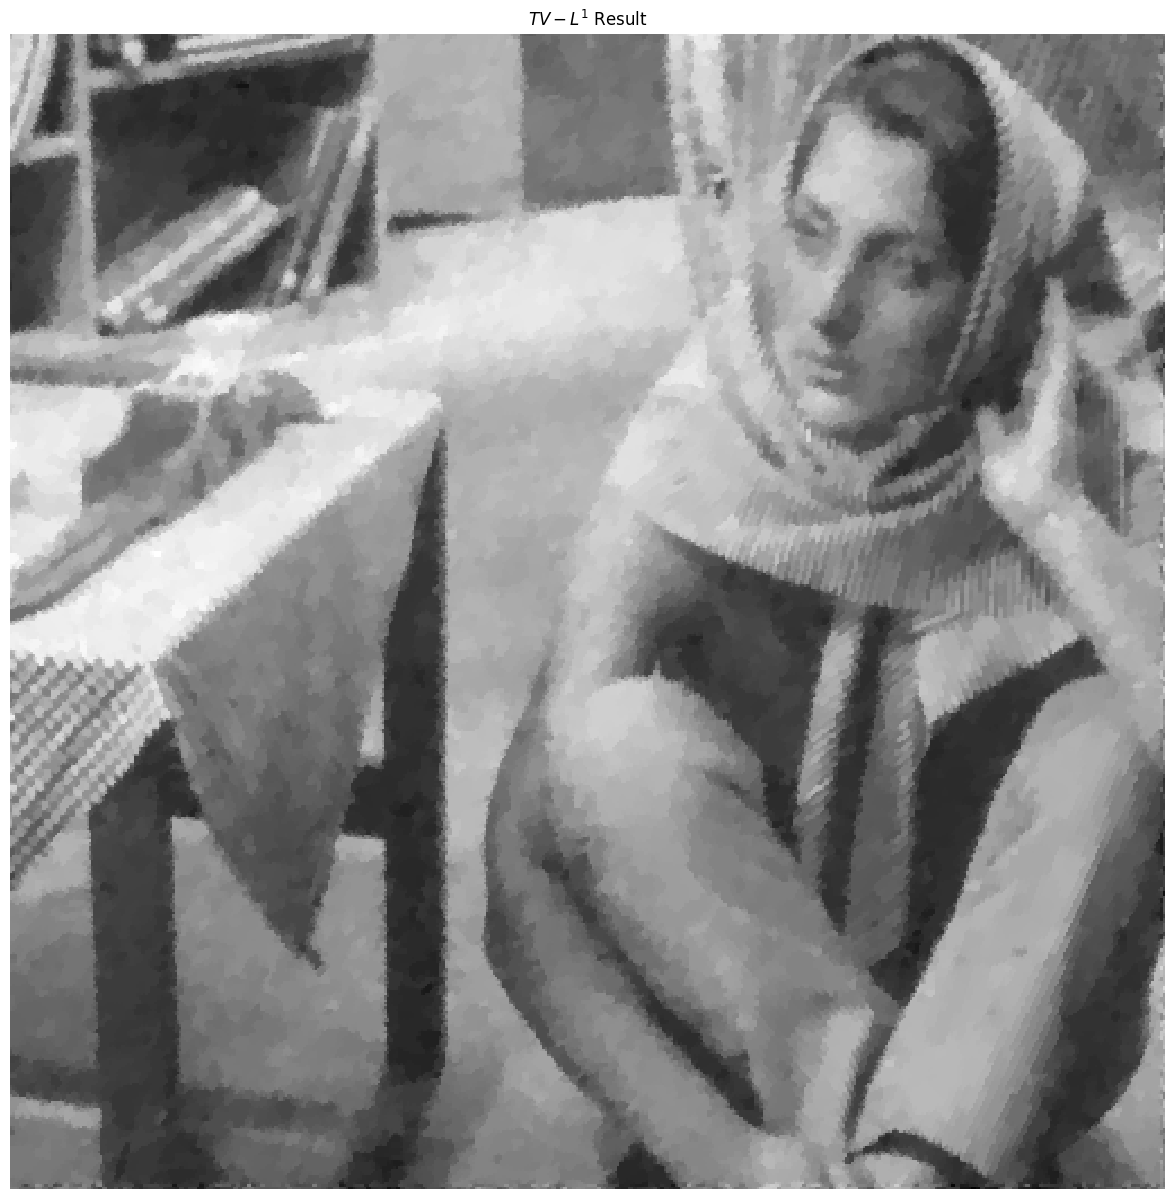

In [10]:
fig3 = plt.figure(figsize=(15,15))
plt.imshow(u, cmap="gray", interpolation='none')
plt.title(r'$TV-L^1$ Result')
plt.axis('off')

# $TV-L^2$ inpainting
Denoting $I$ the set of missing pixels (and $D$ the image domain), the algorithm solves

$$\arg\min_u \|\nabla u\|_1+\frac{\lambda}{2}\sum_{(i,j)\in D\backslash I} (u_{i,j}-f_{i,j})^2$$

#### Create the mask of missing pixels

In [11]:
mask = np.ones(f.shape)
I = np.random.uniform(0, 1, f.shape)
mask[I>0.4] = 0

#### Display the input image with missing pixels

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

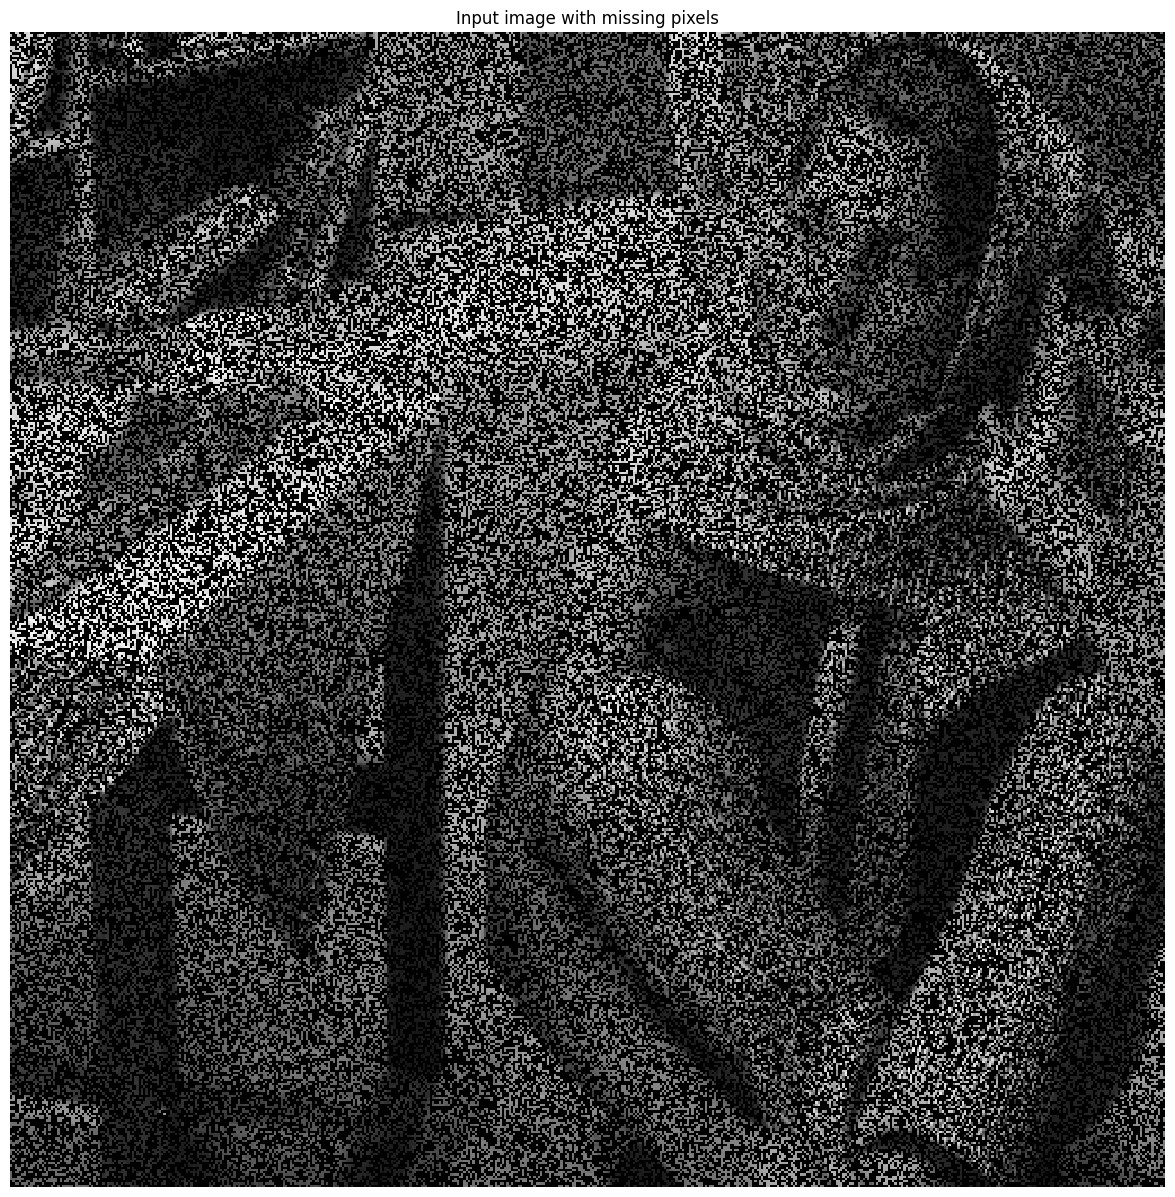

In [12]:
fig4 = plt.figure(figsize=(15,15))
plt.imshow(f * mask, cmap="gray", interpolation='none')
plt.title('Input image with missing pixels')
plt.axis('off')


#### Set parameters

In [13]:
lambd = 10000 #regularization
tau = 0.01 #dual fidelity
theta = 1.0 #primal-dual selection method (1 <=> guaranteed convergence
N = 100 #number of iteration

#### Apply the $TV-L^2$ inpainting algorithm

In [14]:
u = pd.PD_TVL2inpainting(f * mask, mask, lambd, tau, theta, N)


#### Display the result

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

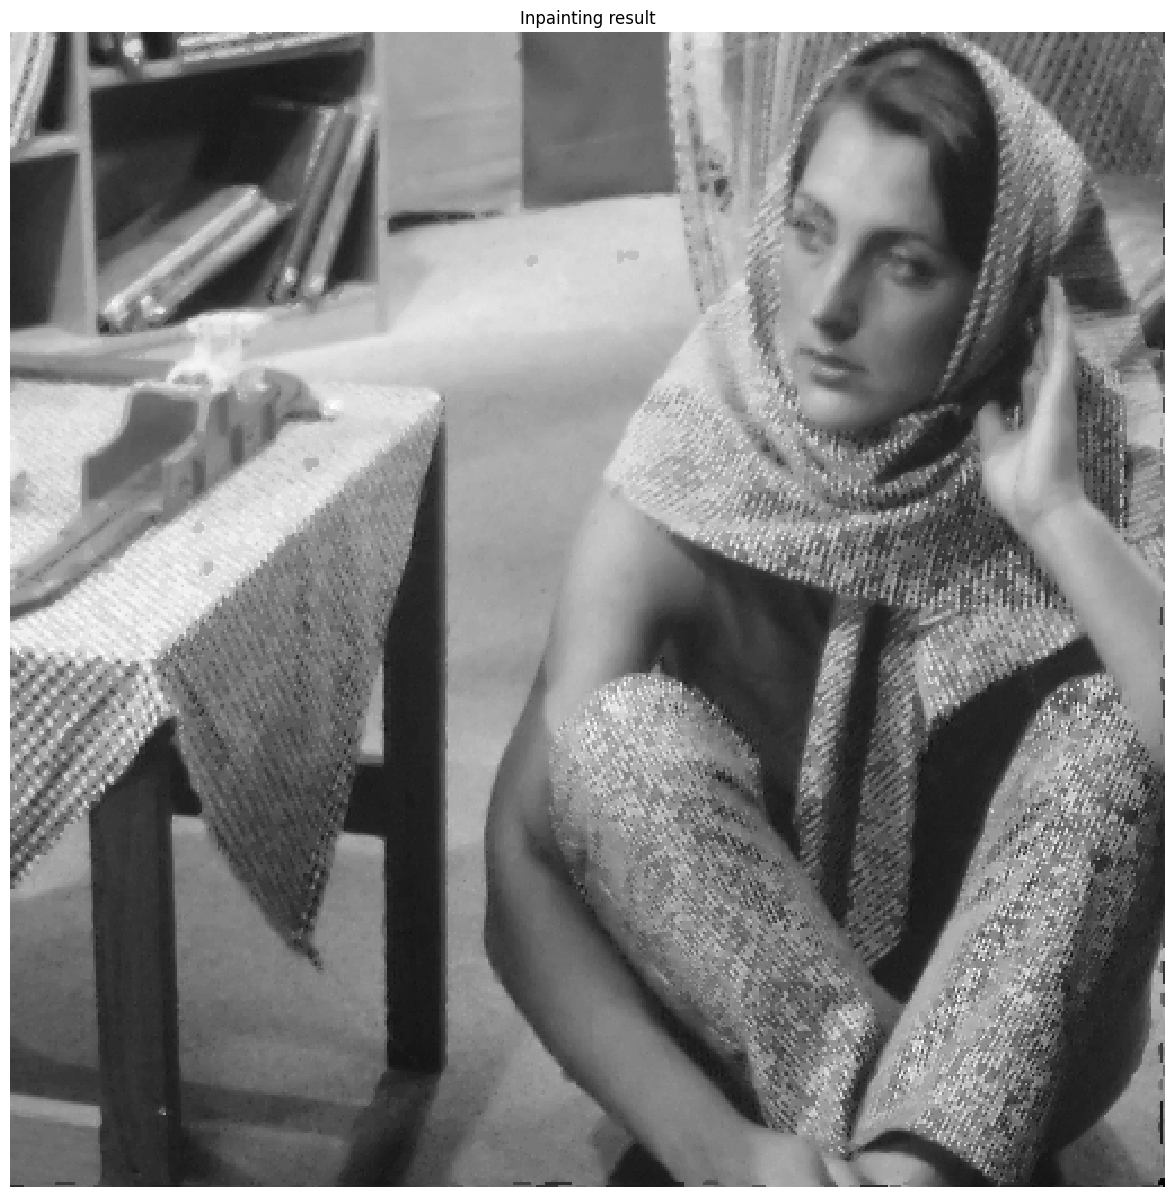

In [15]:
fig5 = plt.figure(figsize=(15,15))
plt.imshow(u, cmap="gray", interpolation='none')
plt.title('Inpainting result')
plt.axis('off')

# $TV-L^2$ Multi-observations

We assume we have a sequence $\{f_k\}_{k=0}^{N_o-1}$ observation of the same scene. The algorithm solves

$$\arg\min_u \|\nabla u\|_1+\frac{\lambda}{2}\sum_{k=0}^{N_o-1}\|u-f_k\|_2^2$$

#### We create the input sequence (i.e same image with different noise realization)

In [16]:
No = 20
fk = np.repeat(f[:,:,np.newaxis], No, axis=2)
noise = np.random.normal(0, .1, fk.shape)

#### Set parameters

In [17]:
lambd = 2 #regularization
tau = 0.01 #dual fidelity
theta = 1.0 #primal-dual selection method (1 <=> guaranteed convergence
N = 100 #number of iteration

#### Display input sequence

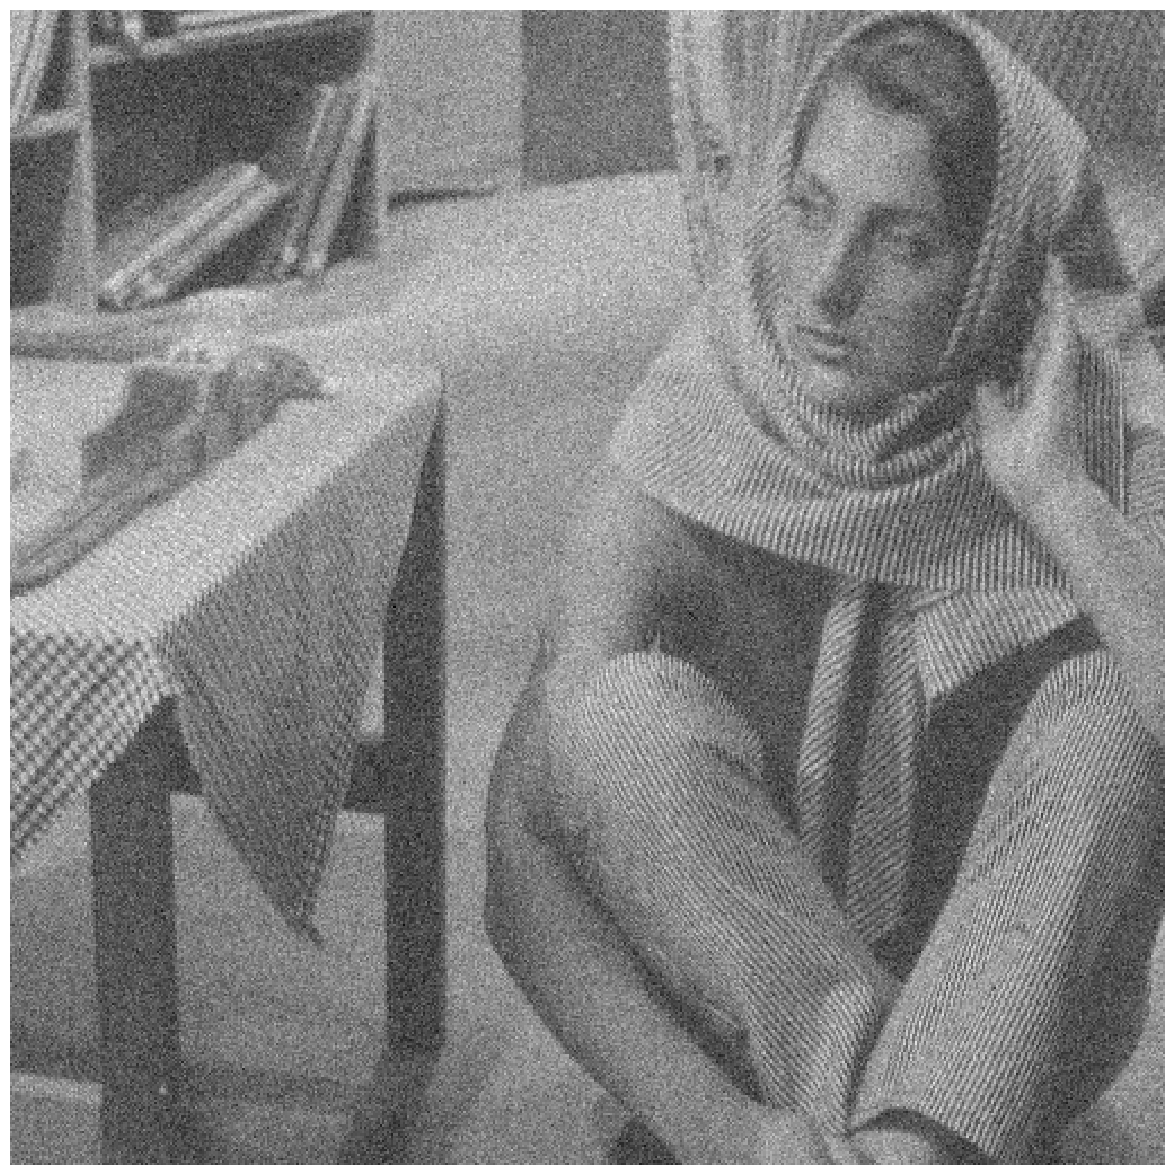

In [18]:
# Uncomment these two lines when using the mathplot animation option
# fig6 = plt.figure(figsize=(15,15))
# ims = []
for j in range(No):
    # To play one round of the sequence within the pycharm notebook
    fig6 = plt.figure(figsize=(15,15))
    plt.imshow(fk[:,:,j]+noise[:,:,j], cmap="gray", interpolation='none')
    plt.axis('off')
    plt.show()
    clear_output(wait=True)

    # To play the sequence as an animation -> qt backend of mathplot must activated, see first line of this file
#     im = plt.imshow(fk[:,:,j]+noise[:,:,j], animated=True, cmap="gray", interpolation='none')
#     plt.axis('off')
#     plt.title('Input noisy multi-observation sequence')
#     ims.append([im])
#
# ani = animation.ArtistAnimation(fig6, ims)

#### Apply multi-observation $TV-L^2$

In [19]:
u = pd.PD_TVL2multi(fk, lambd, tau, theta, N)


#### Display the result

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

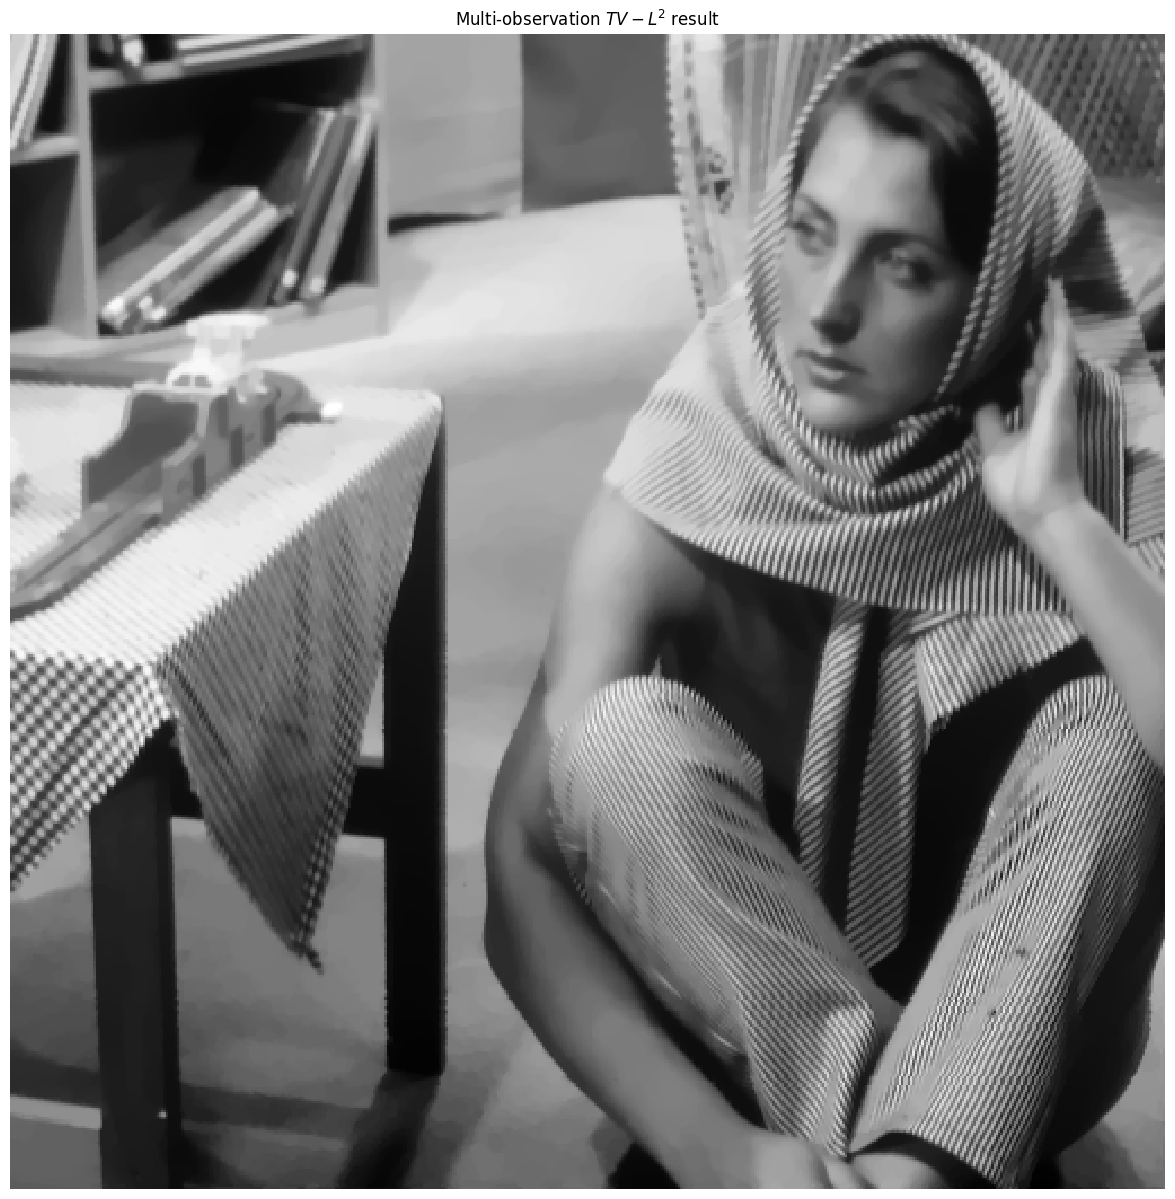

In [20]:
fig7 = plt.figure(figsize=(15,15))
plt.imshow(u, cmap="gray", interpolation='none')
plt.title(r'Multi-observation $TV-L^2$ result')
plt.axis('off')